# Tutorial 5: Rubidium-85 D Line

Rubidium is a heavy atom with hyperfine structure. Modelling of the Rb<sup>85</sup> D line is shown in this tutorial using the `LASED` library. The calculations will be compared with J.Pursehouse's PhD thesis as he modelled the same system.

In [1]:
import LASED as las
import plotly.graph_objects as go
import numpy as np
import time

from IPython.display import Image  # To display images in Jupyter notebooks

The data for Rubidium can be accessed [here](https://ethos.bl.uk/OrderDetails.do?uin=uk.bl.ethos.740344). The 5$^2$S$_{1/2}$ to the 5$^2$P$_{3/2}$ transition will be modelled here with F' = 3 to the F = 4 level as the resonant transition and all other terms will be detuned from this resonance. A level diagram of the system is shown below. This system has more energy levels than the sodium D-line.

![RbLevelDiagram](LevelDiagrams/Rb-85-5S1_2to5P3_2.jpg)

## Setting up the System

Set up the system in the exact same way that the sodium system was setup but with different numbers.

In [2]:
# 5^2S_{1/2} -> 5^2P_{3/2}
wavelength_rb = 780.2e-9  # Wavelength in nm
w_e = las.angularFreq(wavelength_rb)
tau_rb = 26.3 # in ns

I_rb = 5/2  # Isospin for sodium 
PI = np.pi

# Energy Splittings
w1 = 3.0357*2*PI # Splitting of 5^2S_{1/2}(F' = 2) -> (F' = 3) in Grad/s
w2 = 0.0294*2*PI  # Splitting between 5^2P_{3/2} F = 1 and F = 2 in Grad/s
w3 = 0.0634*2*PI  # Splitting between 5^2P_{3/2} F = 2 and F = 3 in Grad/s
w4 = 0.1206*2*PI  # Splitting between 5^2P_{3/2} F = 3 and F = 3 in Grad/s

# Detunings
w_Fp2 = -1*w1
w_F1 = w_e-(w4+w3+w2)
w_F2 = w_e-(w4+w3)
w_F3 = w_e-w4
w_F4 = w_e

# Create states 
# 5^2S_{1/2}
Fp2 = las.generateSubStates(label_from = 1, w = w_Fp2, L = 0, S = 1/2, I = I_rb, F = 2)
Fp3 = las.generateSubStates(label_from = 6, w = 0, L = 0, S = 1/2, I = I_rb, F = 3)

# 5^2P_{3/2}
F1 = las.generateSubStates(label_from = 13, w = w_F1, L = 1, S = 1/2, I = I_rb, F = 1)
F2 = las.generateSubStates(label_from = 16, w = w_F2, L = 1, S = 1/2, I = I_rb, F = 2)
F3 = las.generateSubStates(label_from = 21, w = w_F3, L = 1, S = 1/2, I = I_rb, F = 3)
F4 = las.generateSubStates(label_from = 28, w = w_F4, L = 1, S = 1/2, I = I_rb, F = 4)

# Declare excited and ground states
G_rb = Fp2 + Fp3
E_rb = F1 + F2 + F3 + F4

# Laser parameters
intensity_rb = 20 # mW/mm^-2
Q_rb = [0]
Q_decay = [1, 0, -1]

# Simulation parameters
start_time = 0
stop_time = 500 # in ns
time_steps = 501
time_rb = np.linspace(start_time, stop_time, time_steps)

## Time Evolution

The time evolution of this system will take much longer than the sodium as the complexity scales as n$^2$ where n is the number of energy levels and sodium has 24 compared to rubidium's 36. 

Create a `LaserAtomSystem` object and time evolve the system using `timeEvolution()`

In [3]:
rb_system = las.LaserAtomSystem(E_rb, G_rb, tau_rb, Q_rb, wavelength_rb, laser_intensity = intensity_rb)
tic = time.perf_counter()
rb_system.timeEvolution(time_rb)
toc = time.perf_counter()
print(f"The code finished in {toc-tic:0.4f} seconds")

Populating ground states equally as the initial condition.
The code finished in 2268.3734 seconds


## Saving and Plotting

Now save and plot the results

In [4]:
rb_system.saveToCSV("SavedData/RubidiumDLine20mW.csv")

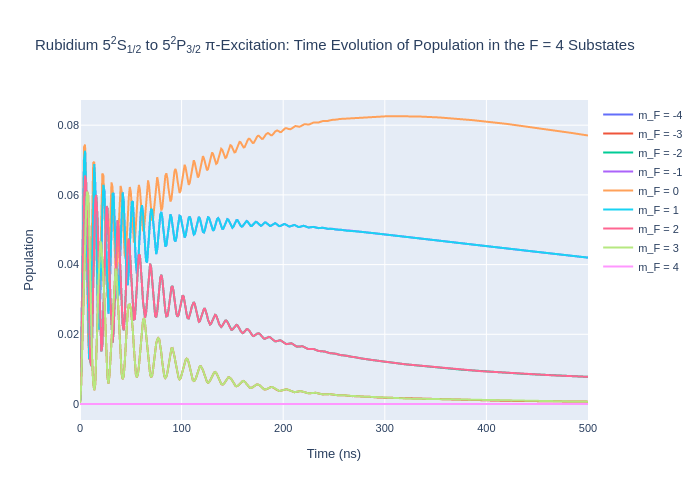

In [5]:
rho_to_plot = [ [abs(rho) for rho in rb_system.Rho_t(s, s)] for s in F4]

fig_rbF4 = go.Figure()

for i, rho in enumerate(rho_to_plot):
    fig_rbF4.add_trace(go.Scatter(x = time_rb, 
                                y = rho,
                                name = f"m_F = {F4[i].m}",
                               mode = 'lines'))

fig_rbF4.update_layout(title = "Rubidium 5<sup>2</sup>S<sub>1/2</sub> to 5<sup>2</sup>P<sub>3/2</sub> π-Excitation: Time Evolution of Population in the F = 4 Substates",
                 xaxis_title = "Time (ns)",
                 yaxis_title = "Population",
                font = dict(
                    size = 11))
fig_rbF4.write_image(f"SavedPlots/RbF=4I={intensity_rb}.png")
Image(f"SavedPlots/RbF=4I={intensity_rb}.png")

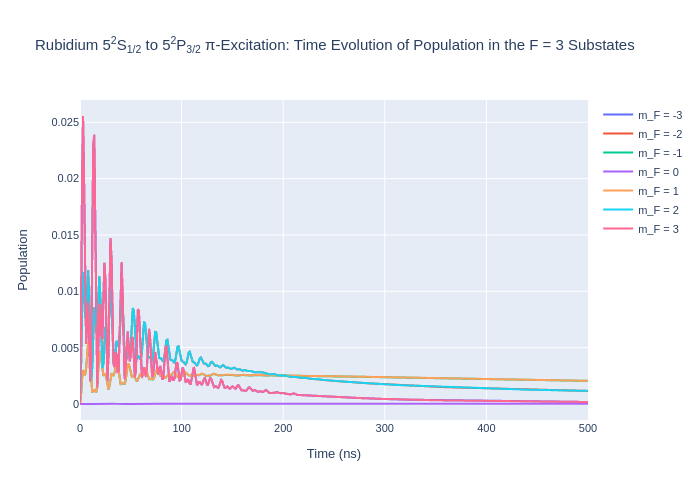

In [6]:
rho_to_plot = [ [abs(rho) for rho in rb_system.Rho_t(s, s)] for s in F3]

fig_rbF3 = go.Figure()

for i, rho in enumerate(rho_to_plot):
    fig_rbF3.add_trace(go.Scatter(x = time_rb, 
                                y = rho,
                                name = f"m_F = {F3[i].m}",
                               mode = 'lines'))

fig_rbF3.update_layout(title = "Rubidium 5<sup>2</sup>S<sub>1/2</sub> to 5<sup>2</sup>P<sub>3/2</sub> π-Excitation: Time Evolution of Population in the F = 3 Substates",
                 xaxis_title = "Time (ns)",
                 yaxis_title = "Population",
                font = dict(
                    size = 11))
fig_rbF3.write_image(f"SavedPlots/RbF=3I={intensity_rb}.png")
Image(f"SavedPlots/RbF=3I={intensity_rb}.png")

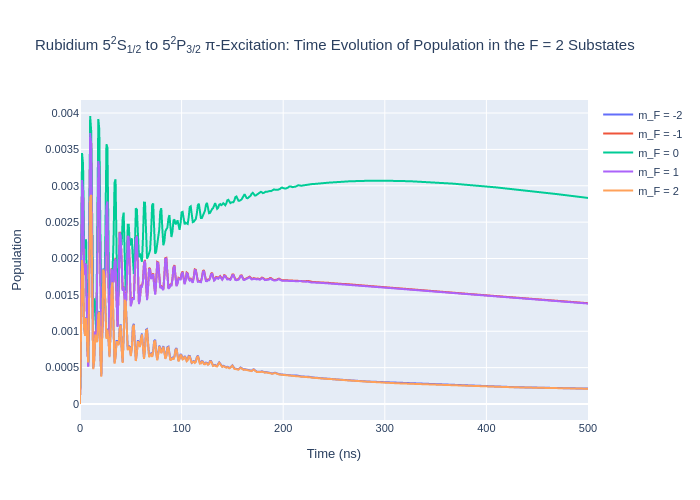

In [7]:
rho_to_plot = [ [abs(rho) for rho in rb_system.Rho_t(s, s)] for s in F2]

fig_rbF2 = go.Figure()

for i, rho in enumerate(rho_to_plot):
    fig_rbF2.add_trace(go.Scatter(x = time_rb, 
                                y = rho,
                                name = f"m_F = {F2[i].m}",
                               mode = 'lines'))

fig_rbF2.update_layout(title = "Rubidium 5<sup>2</sup>S<sub>1/2</sub> to 5<sup>2</sup>P<sub>3/2</sub> π-Excitation: Time Evolution of Population in the F = 2 Substates",
                 xaxis_title = "Time (ns)",
                 yaxis_title = "Population",
                font = dict(
                    size = 11))
fig_rbF2.write_image(f"SavedPlots/RbF=2I={intensity_rb}.png")
Image(f"SavedPlots/RbF=2I={intensity_rb}.png")

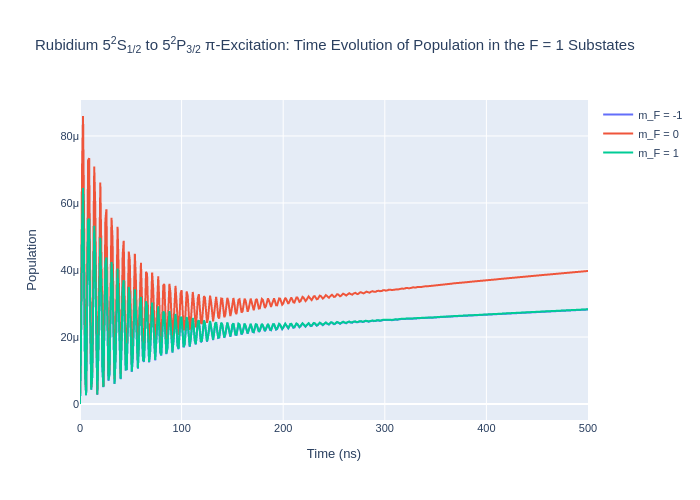

In [8]:
rho_to_plot = [ [abs(rho) for rho in rb_system.Rho_t(s, s)] for s in F1]

fig_rbF1 = go.Figure()

for i, rho in enumerate(rho_to_plot):
    fig_rbF1.add_trace(go.Scatter(x = time_rb, 
                                y = rho,
                                name = f"m_F = {F1[i].m}",
                               mode = 'lines'))

fig_rbF1.update_layout(title = "Rubidium 5<sup>2</sup>S<sub>1/2</sub> to 5<sup>2</sup>P<sub>3/2</sub> π-Excitation: Time Evolution of Population in the F = 1 Substates",
                 xaxis_title = "Time (ns)",
                 yaxis_title = "Population",
                font = dict(
                    size = 11))
fig_rbF1.write_image(f"SavedPlots/RbF=1I={intensity_rb}.png")
Image(f"SavedPlots/RbF=1I={intensity_rb}.png")

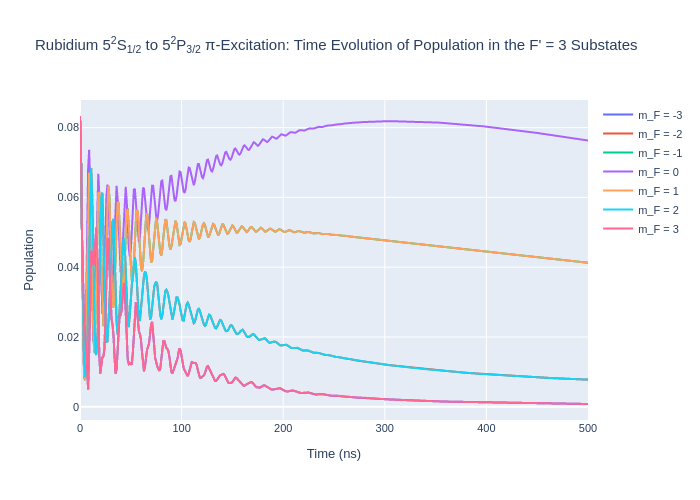

In [9]:
rho_to_plot = [ [abs(rho) for rho in rb_system.Rho_t(s, s)] for s in Fp3]

fig_rbFp3 = go.Figure()

for i, rho in enumerate(rho_to_plot):
    fig_rbFp3.add_trace(go.Scatter(x = time_rb, 
                                y = rho,
                                name = f"m_F = {Fp3[i].m}",
                               mode = 'lines'))

fig_rbFp3.update_layout(title = "Rubidium 5<sup>2</sup>S<sub>1/2</sub> to 5<sup>2</sup>P<sub>3/2</sub> π-Excitation: Time Evolution of Population in the F' = 3 Substates",
                 xaxis_title = "Time (ns)",
                 yaxis_title = "Population",
                font = dict(
                    size = 11))
fig_rbFp3.write_image(f"SavedPlots/RbFp=3I={intensity_rb}.png")
Image(f"SavedPlots/RbFp=3I={intensity_rb}.png")

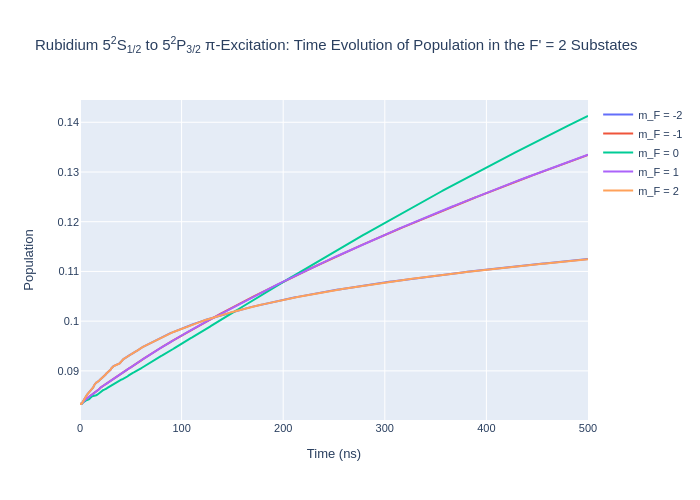

In [10]:
rho_to_plot = [ [abs(rho) for rho in rb_system.Rho_t(s, s)] for s in Fp2]

fig_rbFp2 = go.Figure()

for i, rho in enumerate(rho_to_plot):
    fig_rbFp2.add_trace(go.Scatter(x = time_rb, 
                                y = rho,
                                name = f"m_F = {Fp2[i].m}",
                               mode = 'lines'))

fig_rbFp2.update_layout(title = "Rubidium 5<sup>2</sup>S<sub>1/2</sub> to 5<sup>2</sup>P<sub>3/2</sub> π-Excitation: Time Evolution of Population in the F' = 2 Substates",
                 xaxis_title = "Time (ns)",
                 yaxis_title = "Population",
                font = dict(
                    size = 11))
fig_rbFp2.write_image(f"SavedPlots/RbFp=2I={intensity_rb}.png")
Image(f"SavedPlots/RbFp=2I={intensity_rb}.png")